0.970999233099134


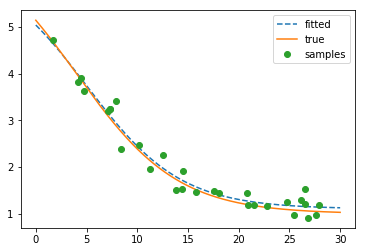

In [5]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x, c, k, x0, y0):

    return c / (1 + np.exp(-k*(x-x0))) + y0

# Parameters of the true function
n_samples = 1000
true_c = 6
true_y0 = 1
true_x0 = 4
true_k = -.2
sigma = 0.2

# Build the true function and add some noise
x = np.linspace(0, 30, num=n_samples)
y = sigmoid(x, c=true_c, k=true_k, x0=true_x0, y0=true_y0) 
y_with_noise = y + sigma * np.random.randn(n_samples)

# Sample the data from the real function (this will be your data)
some_points = np.random.choice(1000, size=30)  # take 30 data points
xdata = x[some_points]
ydata = y_with_noise[some_points]

# Fit the curve
popt, pcov = curve_fit(sigmoid, xdata, ydata, maxfev=5000, method='dogbox', bounds=([2, -2, 2, 0],[8, 2, 5, 10]))
estimated_c, estimated_k, estimated_x0, estimated_y0 = popt

# Plot the fitted curve
y_fitted = sigmoid(x, c=estimated_c, k=estimated_k, x0=estimated_x0, y0=estimated_y0)

r_square = r2_score(y_with_noise, y_fitted)
print(r_square)

# Plot everything for illustration
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y_fitted, '--', label='fitted')
ax.plot(x, y, '-', label='true')
ax.plot(xdata, ydata, 'o', label='samples')

ax.legend()